In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Neural Code

- Sensory signals or written language are converted into physical processes inside brains that contain some version of that information (code). "Adrienne Fairhall"  

**Recording from brain**

- **fMRI**: functional Magnetic Resonance, record brain while performing some tasks. MRI scan is just of organs/tissue, but an fMRI image of blood flow in the brain which tells which parts of the brain are being stimulated. Glucose is the brain's primary source of energy, but glucose is not stored in the brain. So when parts of the brain need energy to perform an action, more blood flows in to transport glucose to the active areas, thus more oxygen-rich blood enters the area.

- The person's head is placed inside the **fMRI** in middle of a large magnet, There is a scanner that measures perturbations in the magnetic field which happen due to change in blood oxygenation, **fMRI gives image at a scale of cubic millimeter which is the average activity of millions of neurons**.

- **EEG or electroencephalogram**: faster way, it captures the chnages in electric fields.

- **fMRI** and **EEG** are useful because they can noninvasively record neural activity in awake and behaving humans. However, it can not record directly from single neurons, the signals are averages of the approximate activity of large groups of neurons.


- **Electrode Array**: the device is made from amplifiers to amplify the tiny signal from single neurons ... The electrodes can be moved individually into tissues at different depth allowing to find active cells. 

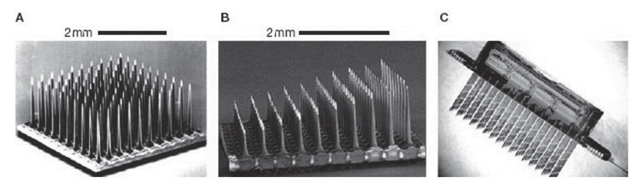

In [2]:
Image(filename= "multi_electrode.png", width=400)

- **Calcium Imaging**

## References:

https://www.jameco.com/Jameco/workshop/HowItWorks/what-is-an-fmri-scan-and-how-does-it-work.html

https://www.researchgate.net/figure/Different-types-of-the-electrode-arrays-A-The-Utah-Electrode-Array-UEA-B-The-Utah_fig1_320649329
    
    